#                                Mutual Fund Performance Analysis

## AIM

To analyse mutual fund schemes across different categories, investors (folios), fund flow activity and AUM behaviour, and to understand overall market movement using AUM, folio strength, and segregated portfolio presence.

## OBJECTIVES

1-To identify the distribution of scheme types and scheme categories in the dataset.

2-To study investor participation using number of folios.

3-To understand investment movement through fund mobilized, redemption and net flow.

4-To compare fund size using Net AUM and Average AUM.

5-To check if any schemes have separated stressed assets through segregated portfolios.

6-To create new grouping categories such as folio size category and AUM level and analyse them.

7-To perform Groupby, Pivot and Correlation to interpret relationships between variables.

## DATASET DESCRIPTION

| Column | Meaning |
|--------|---------|
| date | reporting date of each mutual fund scheme |
| scheme_name | specific scheme name |
| scheme_type | Open, Close, Interval schemes |
| scheme_category | Growth, Hybrid, Debt, Others |
| no_of_schemes | number of schemes under that category |
| no_of_folios | number of investors |
| fund_mobilized | inflow amount |
| repurchase_redemption | outflow amount |
| net_inflow_outflow | difference between inflow and outflow |
| fund_value | total fund value handled |
| avg_net_aum | average AUM of the same period |
| net_aum | net AUM |
| no_segregated_portfolios | count of separated stressed holdings |
| net_in_segregated_portfolios | AUM inside segregated assets |
| folio_size_category | derived based on folio volume |
| aum_level_category | derived based on net AUM level |

### 1. Data Loading and Initial Overview

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("mutual-funds-report.csv")

In [3]:
df

id        date                     scheme_name          scheme_type  \
0        0  01-04-2019                  Overnight Fund   Open ended Schemes   
1        1  01-04-2019                     Liquid Fund   Open ended Schemes   
2        2  01-04-2019       Ultra Short Duration Fund   Open ended Schemes   
3        3  01-04-2019               Low Duration Fund   Open ended Schemes   
4        4  01-04-2019               Money Market Fund   Open ended Schemes   
...    ...         ...                             ...                  ...   
3110  3110  01-09-2023            Other Equity Schemes  Close Ended Schemes   
3111  3111  01-09-2023                   Other Schemes  Close Ended Schemes   
3112  3112  01-09-2023    Income/Debt Oriented Schemes     Interval Schemes   
3113  3113  01-09-2023  Growth/Equity Oriented Schemes     Interval Schemes   
3114  3114  01-09-2023                   Other Schemes     Interval Schemes   

                     scheme_category  no_of_schemes  no_of_folios  \
0       Income/Debt Oriented Schemes           16.0       21363.0   
1       Income/Debt Oriented Schemes           40.0     1451293.0   
2       Income/Debt Oriented Schemes           25.0      591392.0   
3       Income/Debt Oriented Schemes           26.0      922455.0   
4       Income/Debt Oriented Schemes           16.0      284325.0   
...                              ...            ...           ...   
3110  Growth/Equity Oriented Schemes            1.0        1738.0   
3111                   Other Schemes            0.0           0.0   
3112    Income/Debt Oriented Schemes           12.0        2627.0   
3113  Growth/Equity Oriented Schemes            0.0           0.0   
3114                   Other Schemes            0.0           0.0   

      fund_mobilized  repurchase_redemption  net_inflow_outflow    net_aum  \
0           31583.00               31487.26               95.74   11309.75   
1         1741122.88             1651344.44            89778.43  477842.96   
2           21187.24               10149.98            11037.26   87144.67   
3           13428.89                8515.54             4913.35   89821.94   
4           14309.15                7890.63             6418.52   59017.65   
...              ...                    ...                 ...        ...   
3110            0.00                 206.02             -206.02     114.37   
3111            0.00                   0.00                0.00       0.00   
3112            0.02                  32.36              -32.34     276.81   
3113            0.00                   0.00                0.00       0.00   
3114            0.00                   0.00                0.00       0.00   

      avg_net_aum  no_of_segregated_portfolios  \
0        11566.84                          NaN   
1       510923.83                          NaN   
2        86203.31                          NaN   
3        90672.65                          NaN   
4        59200.30                          NaN   
...           ...                          ...   
3110       273.00                          0.0   
3111         0.00                          0.0   
3112       308.96                          0.0   
3113         0.00                          0.0   
3114         0.00                          0.0   

      net_aum_in_segregated_portfolios  
0                                  NaN  
1                                  NaN  
2                                  NaN  
3                                  NaN  
4                                  NaN  
...                                ...  
3110                               0.0  
3111                               0.0  
3112                               0.0  
3113                               0.0  
3114                               0.0  

[3115 rows x 14 columns]

In [4]:
df.columns

Index(['id', 'date', 'scheme_name', 'scheme_type', 'scheme_category',
       'no_of_schemes', 'no_of_folios', 'fund_mobilized',
       'repurchase_redemption', 'net_inflow_outflow', 'net_aum', 'avg_net_aum',
       'no_of_segregated_portfolios', 'net_aum_in_segregated_portfolios'],
      dtype='object')

In [5]:
df.head()

id        date                scheme_name         scheme_type  \
0   0  01-04-2019             Overnight Fund  Open ended Schemes   
1   1  01-04-2019                Liquid Fund  Open ended Schemes   
2   2  01-04-2019  Ultra Short Duration Fund  Open ended Schemes   
3   3  01-04-2019          Low Duration Fund  Open ended Schemes   
4   4  01-04-2019          Money Market Fund  Open ended Schemes   

                scheme_category  no_of_schemes  no_of_folios  fund_mobilized  \
0  Income/Debt Oriented Schemes           16.0       21363.0        31583.00   
1  Income/Debt Oriented Schemes           40.0     1451293.0      1741122.88   
2  Income/Debt Oriented Schemes           25.0      591392.0        21187.24   
3  Income/Debt Oriented Schemes           26.0      922455.0        13428.89   
4  Income/Debt Oriented Schemes           16.0      284325.0        14309.15   

   repurchase_redemption  net_inflow_outflow    net_aum  avg_net_aum  \
0               31487.26               95.74   11309.75     11566.84   
1             1651344.44            89778.43  477842.96    510923.83   
2               10149.98            11037.26   87144.67     86203.31   
3                8515.54             4913.35   89821.94     90672.65   
4                7890.63             6418.52   59017.65     59200.30   

   no_of_segregated_portfolios  net_aum_in_segregated_portfolios  
0                          NaN                               NaN  
1                          NaN                               NaN  
2                          NaN                               NaN  
3                          NaN                               NaN  
4                          NaN                               NaN

In [6]:
df.tail()

id        date                     scheme_name          scheme_type  \
3110  3110  01-09-2023            Other Equity Schemes  Close Ended Schemes   
3111  3111  01-09-2023                   Other Schemes  Close Ended Schemes   
3112  3112  01-09-2023    Income/Debt Oriented Schemes     Interval Schemes   
3113  3113  01-09-2023  Growth/Equity Oriented Schemes     Interval Schemes   
3114  3114  01-09-2023                   Other Schemes     Interval Schemes   

                     scheme_category  no_of_schemes  no_of_folios  \
3110  Growth/Equity Oriented Schemes            1.0        1738.0   
3111                   Other Schemes            0.0           0.0   
3112    Income/Debt Oriented Schemes           12.0        2627.0   
3113  Growth/Equity Oriented Schemes            0.0           0.0   
3114                   Other Schemes            0.0           0.0   

      fund_mobilized  repurchase_redemption  net_inflow_outflow  net_aum  \
3110            0.00                 206.02             -206.02   114.37   
3111            0.00                   0.00                0.00     0.00   
3112            0.02                  32.36              -32.34   276.81   
3113            0.00                   0.00                0.00     0.00   
3114            0.00                   0.00                0.00     0.00   

      avg_net_aum  no_of_segregated_portfolios  \
3110       273.00                          0.0   
3111         0.00                          0.0   
3112       308.96                          0.0   
3113         0.00                          0.0   
3114         0.00                          0.0   

      net_aum_in_segregated_portfolios  
3110                               0.0  
3111                               0.0  
3112                               0.0  
3113                               0.0  
3114                               0.0

In [7]:
df.sample()

id        date      scheme_name          scheme_type  \
2376  2376  01-05-2024  Fixed Term Plan  Close Ended Schemes   

                   scheme_category  no_of_schemes  no_of_folios  \
2376  Income/Debt Oriented Schemes           82.0       68573.0   

      fund_mobilized  repurchase_redemption  net_inflow_outflow   net_aum  \
2376             0.0                 255.68             -255.68  15505.85   

      avg_net_aum  no_of_segregated_portfolios  \
2376     15547.35                          0.0   

      net_aum_in_segregated_portfolios  
2376                               0.0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3115 entries, 0 to 3114
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3115 non-null   int64  
 1   date                              3115 non-null   object 
 2   scheme_name                       3115 non-null   object 
 3   scheme_type                       3115 non-null   object 
 4   scheme_category                   3115 non-null   object 
 5   no_of_schemes                     3115 non-null   float64
 6   no_of_folios                      3115 non-null   float64
 7   fund_mobilized                    3115 non-null   float64
 8   repurchase_redemption             3115 non-null   float64
 9   net_inflow_outflow                3115 non-null   float64
 10  net_aum                           3115 non-null   float64
 11  avg_net_aum                       3115 non-null   float64
 12  no_of_

In [9]:
df.shape

(3115, 14)

In [10]:
df.describe()

id  no_of_schemes  no_of_folios  fund_mobilized  \
count  3115.00000    3115.000000  3.115000e+03    3.115000e+03   
mean   1557.00000      32.899839  2.518408e+06    2.026359e+04   
std     899.36737      67.610949  3.901334e+06    1.086546e+05   
min       0.00000       0.000000  0.000000e+00   -1.085388e+04   
25%     778.50000      12.000000  1.722775e+05    9.224000e+01   
50%    1557.00000      22.000000  5.216060e+05    1.022550e+03   
75%    2335.50000      29.000000  3.522135e+06    4.081470e+03   
max    3114.00000     800.000000  2.478630e+07    2.143173e+06   

       repurchase_redemption  net_inflow_outflow        net_aum  \
count           3.115000e+03         3115.000000    3115.000000   
mean            1.979022e+04          473.369124   75805.387506   
std             1.084230e+05         9126.246498   97879.637158   
min            -1.493182e+04      -157970.380000       0.000000   
25%             1.066050e+02         -166.490000    9137.100000   
50%             8.800500e+02           26.850000   31617.130000   
75%             3.183220e+03          957.000000  108359.705000   
max             2.097732e+06       102751.500000  777300.880000   

         avg_net_aum  no_of_segregated_portfolios  \
count    3115.000000                  2107.000000   
mean    76722.931403                     0.353109   
std     99934.678592                     1.081505   
min         0.000000                     0.000000   
25%      9022.675000                     0.000000   
50%     31897.350000                     0.000000   
75%    111653.280000                     0.000000   
max    762996.930000                    10.000000   

       net_aum_in_segregated_portfolios  
count                       2107.000000  
mean                           6.463155  
std                           34.894637  
min                            0.000000  
25%                            0.000000  
50%                            0.000000  
75%                            0.000000  
max                          330.245700

### 2. Data Pre-processing

In [11]:
df.isna().sum()

id                                     0
date                                   0
scheme_name                            0
scheme_type                            0
scheme_category                        0
no_of_schemes                          0
no_of_folios                           0
fund_mobilized                         0
repurchase_redemption                  0
net_inflow_outflow                     0
net_aum                                0
avg_net_aum                            0
no_of_segregated_portfolios         1008
net_aum_in_segregated_portfolios    1008
dtype: int64

In [12]:
#Replace missing values with 0

df['no_of_segregated_portfolios'] = df['no_of_segregated_portfolios'].fillna(0)
df['net_aum_in_segregated_portfolios'] = df['net_aum_in_segregated_portfolios'].fillna(0)


In [13]:
df.drop('id', axis=1, inplace=True)
# no significant role for id column

In [14]:
df

date                     scheme_name          scheme_type  \
0     01-04-2019                  Overnight Fund   Open ended Schemes   
1     01-04-2019                     Liquid Fund   Open ended Schemes   
2     01-04-2019       Ultra Short Duration Fund   Open ended Schemes   
3     01-04-2019               Low Duration Fund   Open ended Schemes   
4     01-04-2019               Money Market Fund   Open ended Schemes   
...          ...                             ...                  ...   
3110  01-09-2023            Other Equity Schemes  Close Ended Schemes   
3111  01-09-2023                   Other Schemes  Close Ended Schemes   
3112  01-09-2023    Income/Debt Oriented Schemes     Interval Schemes   
3113  01-09-2023  Growth/Equity Oriented Schemes     Interval Schemes   
3114  01-09-2023                   Other Schemes     Interval Schemes   

                     scheme_category  no_of_schemes  no_of_folios  \
0       Income/Debt Oriented Schemes           16.0       21363.0   
1       Income/Debt Oriented Schemes           40.0     1451293.0   
2       Income/Debt Oriented Schemes           25.0      591392.0   
3       Income/Debt Oriented Schemes           26.0      922455.0   
4       Income/Debt Oriented Schemes           16.0      284325.0   
...                              ...            ...           ...   
3110  Growth/Equity Oriented Schemes            1.0        1738.0   
3111                   Other Schemes            0.0           0.0   
3112    Income/Debt Oriented Schemes           12.0        2627.0   
3113  Growth/Equity Oriented Schemes            0.0           0.0   
3114                   Other Schemes            0.0           0.0   

      fund_mobilized  repurchase_redemption  net_inflow_outflow    net_aum  \
0           31583.00               31487.26               95.74   11309.75   
1         1741122.88             1651344.44            89778.43  477842.96   
2           21187.24               10149.98            11037.26   87144.67   
3           13428.89                8515.54             4913.35   89821.94   
4           14309.15                7890.63             6418.52   59017.65   
...              ...                    ...                 ...        ...   
3110            0.00                 206.02             -206.02     114.37   
3111            0.00                   0.00                0.00       0.00   
3112            0.02                  32.36              -32.34     276.81   
3113            0.00                   0.00                0.00       0.00   
3114            0.00                   0.00                0.00       0.00   

      avg_net_aum  no_of_segregated_portfolios  \
0        11566.84                          0.0   
1       510923.83                          0.0   
2        86203.31                          0.0   
3        90672.65                          0.0   
4        59200.30                          0.0   
...           ...                          ...   
3110       273.00                          0.0   
3111         0.00                          0.0   
3112       308.96                          0.0   
3113         0.00                          0.0   
3114         0.00                          0.0   

      net_aum_in_segregated_portfolios  
0                                  0.0  
1                                  0.0  
2                                  0.0  
3                                  0.0  
4                                  0.0  
...                                ...  
3110                               0.0  
3111                               0.0  
3112                               0.0  
3113                               0.0  
3114                               0.0  

[3115 rows x 13 columns]

In [15]:
df.duplicated().sum() # no deplicates found


np.int64(0)

In [16]:
#Convert Date Columns datatype
df['date'] = pd.to_datetime(df['date'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3115 entries, 0 to 3114
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   date                              3115 non-null   datetime64[ns]
 1   scheme_name                       3115 non-null   object        
 2   scheme_type                       3115 non-null   object        
 3   scheme_category                   3115 non-null   object        
 4   no_of_schemes                     3115 non-null   float64       
 5   no_of_folios                      3115 non-null   float64       
 6   fund_mobilized                    3115 non-null   float64       
 7   repurchase_redemption             3115 non-null   float64       
 8   net_inflow_outflow                3115 non-null   float64       
 9   net_aum                           3115 non-null   float64       
 10  avg_net_aum                       3115 non-null 

In [18]:
 # The outliers not removed. They represent genuine market behavior and are meaningful for analysis.”

In [19]:
#(a) Derived column: folio_size_category       limit set based on percentile 
df['folio_size_category'] = 'Low'
df.loc[df['no_of_folios'] > 1700000, 'folio_size_category'] = 'High'
df.loc[(df['no_of_folios'] >= 3500000) & (df['no_of_folios'] <=1700000), 'folio_size_category'] = 'Medium'


In [20]:
# (b) Derived column: aum_level (value)                  limit set based on percentile

def aum_level(value):
    if value < 30000:
        return "Small AUM"
    elif value < 120000:
        return "Medium AUM"
    else:
        return "Large AUM"

df["aum_level"] = df["net_aum"].apply(aum_level)

In [21]:
df

date                     scheme_name          scheme_type  \
0    2019-01-04                  Overnight Fund   Open ended Schemes   
1    2019-01-04                     Liquid Fund   Open ended Schemes   
2    2019-01-04       Ultra Short Duration Fund   Open ended Schemes   
3    2019-01-04               Low Duration Fund   Open ended Schemes   
4    2019-01-04               Money Market Fund   Open ended Schemes   
...         ...                             ...                  ...   
3110 2023-01-09            Other Equity Schemes  Close Ended Schemes   
3111 2023-01-09                   Other Schemes  Close Ended Schemes   
3112 2023-01-09    Income/Debt Oriented Schemes     Interval Schemes   
3113 2023-01-09  Growth/Equity Oriented Schemes     Interval Schemes   
3114 2023-01-09                   Other Schemes     Interval Schemes   

                     scheme_category  no_of_schemes  no_of_folios  \
0       Income/Debt Oriented Schemes           16.0       21363.0   
1       Income/Debt Oriented Schemes           40.0     1451293.0   
2       Income/Debt Oriented Schemes           25.0      591392.0   
3       Income/Debt Oriented Schemes           26.0      922455.0   
4       Income/Debt Oriented Schemes           16.0      284325.0   
...                              ...            ...           ...   
3110  Growth/Equity Oriented Schemes            1.0        1738.0   
3111                   Other Schemes            0.0           0.0   
3112    Income/Debt Oriented Schemes           12.0        2627.0   
3113  Growth/Equity Oriented Schemes            0.0           0.0   
3114                   Other Schemes            0.0           0.0   

      fund_mobilized  repurchase_redemption  net_inflow_outflow    net_aum  \
0           31583.00               31487.26               95.74   11309.75   
1         1741122.88             1651344.44            89778.43  477842.96   
2           21187.24               10149.98            11037.26   87144.67   
3           13428.89                8515.54             4913.35   89821.94   
4           14309.15                7890.63             6418.52   59017.65   
...              ...                    ...                 ...        ...   
3110            0.00                 206.02             -206.02     114.37   
3111            0.00                   0.00                0.00       0.00   
3112            0.02                  32.36              -32.34     276.81   
3113            0.00                   0.00                0.00       0.00   
3114            0.00                   0.00                0.00       0.00   

      avg_net_aum  no_of_segregated_portfolios  \
0        11566.84                          0.0   
1       510923.83                          0.0   
2        86203.31                          0.0   
3        90672.65                          0.0   
4        59200.30                          0.0   
...           ...                          ...   
3110       273.00                          0.0   
3111         0.00                          0.0   
3112       308.96                          0.0   
3113         0.00                          0.0   
3114         0.00                          0.0   

      net_aum_in_segregated_portfolios folio_size_category   aum_level  
0                                  0.0                 Low   Small AUM  
1                                  0.0                 Low   Large AUM  
2                                  0.0                 Low  Medium AUM  
3                                  0.0                 Low  Medium AUM  
4                                  0.0                 Low  Medium AUM  
...                                ...                 ...         ...  
3110                               0.0                 Low   Small AUM  
3111                               0.0                 Low   Small AUM  
3112                               0.0                 Low   Small AUM  
3113                               0.0           

### 3. Exploratory Data Analysis (EDA)

In [22]:
df['scheme_name'].unique()

array(['Overnight Fund', 'Liquid Fund', 'Ultra Short Duration Fund',
       'Low Duration Fund', 'Money Market Fund', 'Short Duration Fund',
       'Medium Duration Fund', 'Medium to Long Duration Fund',
       'Long Duration Fund', 'Dynamic Bond Fund', 'Corporate Bond Fund',
       'Credit Risk Fund', 'Banking and PSU Fund', 'Gilt Fund',
       'Gilt Fund with 10 year constant duration', 'Floater Fund',
       'Multi Cap Fund', 'Large Cap Fund', 'Large & Mid Cap Fund',
       'Mid Cap Fund', 'Small Cap Fund', 'Dividend Yield Fund',
       'Value Fund/Contra Fund', 'Focused Fund',
       'Sectoral/Thematic Funds', 'ELSS', 'Conservative Hybrid Fund',
       'Balanced Hybrid Fund/Aggressive Hybrid Fund',
       'Dynamic Asset Allocation/Balanced Advantage',
       'Multi Asset Allocation', 'Arbitrage Fund', 'Equity Savings',
       'Retirement Fund', 'Childrens Fund', 'Index Funds', 'GOLD ETF',
       'Other ETFs', 'Fund of funds investing overseas',
       'Fixed Term Plan', 'Capital Pr

In [23]:
df['scheme_name'].nunique()

56

In [24]:
df['scheme_type'].unique()

array(['Open ended Schemes', 'Close Ended Schemes', 'Interval Schemes'],
      dtype=object)

In [25]:
df['scheme_name'].value_counts()


scheme_name
Other Schemes                                       128
ELSS                                                128
Overnight Fund                                       64
Liquid Fund                                          64
Money Market Fund                                    64
Short Duration Fund                                  64
Ultra Short Duration Fund                            64
Low Duration Fund                                    64
Long Duration Fund                                   64
Dynamic Bond Fund                                    64
Corporate Bond Fund                                  64
Credit Risk Fund                                     64
Banking and PSU Fund                                 64
Gilt Fund                                            64
Gilt Fund with 10 year constant duration             64
Floater Fund                                         64
Large Cap Fund                                       64
Large & Mid Cap Fund                

In [26]:
df['scheme_type'].value_counts()

scheme_type
Open ended Schemes     2475
Close Ended Schemes     448
Interval Schemes        192
Name: count, dtype: int64

In [27]:
df['scheme_category'].unique()

array(['Income/Debt Oriented Schemes', 'Growth/Equity Oriented Schemes',
       'Hybrid Schemes', 'Solution Oriented Schemes', 'Other Schemes'],
      dtype=object)

In [28]:
df['scheme_category'].value_counts()

scheme_category
Income/Debt Oriented Schemes      1344
Growth/Equity Oriented Schemes     875
Hybrid Schemes                     384
Other Schemes                      384
Solution Oriented Schemes          128
Name: count, dtype: int64

In [29]:
#Filtering

In [30]:
# Filter rows: show only Open Ended schemes
open_scheme = df[df['scheme_type'] == 'Open ended Schemes']


In [31]:
open_scheme

date                       scheme_name         scheme_type  \
0    2019-01-04                    Overnight Fund  Open ended Schemes   
1    2019-01-04                       Liquid Fund  Open ended Schemes   
2    2019-01-04         Ultra Short Duration Fund  Open ended Schemes   
3    2019-01-04                 Low Duration Fund  Open ended Schemes   
4    2019-01-04                 Money Market Fund  Open ended Schemes   
...         ...                               ...                 ...   
3100 2023-01-09                    Childrens Fund  Open ended Schemes   
3101 2023-01-09                       Index Funds  Open ended Schemes   
3102 2023-01-09                          GOLD ETF  Open ended Schemes   
3103 2023-01-09                        Other ETFs  Open ended Schemes   
3104 2023-01-09  Fund of funds investing overseas  Open ended Schemes   

                   scheme_category  no_of_schemes  no_of_folios  \
0     Income/Debt Oriented Schemes           16.0       21363.0   
1     Income/Debt Oriented Schemes           40.0     1451293.0   
2     Income/Debt Oriented Schemes           25.0      591392.0   
3     Income/Debt Oriented Schemes           26.0      922455.0   
4     Income/Debt Oriented Schemes           16.0      284325.0   
...                            ...            ...           ...   
3100     Solution Oriented Schemes           10.0     2944907.0   
3101                 Other Schemes          189.0     5388470.0   
3102                 Other Schemes           13.0     4806140.0   
3103                 Other Schemes          172.0    12462054.0   
3104                 Other Schemes           51.0     1404536.0   

      fund_mobilized  repurchase_redemption  net_inflow_outflow    net_aum  \
0           31583.00               31487.26               95.74   11309.75   
1         1741122.88             1651344.44            89778.43  477842.96   
2           21187.24               10149.98            11037.26   87144.67   
3           13428.89                8515.54             4913.35   89821.94   
4           14309.15                7890.63             6418.52   59017.65   
...              ...                    ...                 ...        ...   
3100          124.31                  57.46               66.85   16729.63   
3101         3908.53                2226.16             1682.36  184028.12   
3102          305.14                 129.85              175.29   23798.83   
3103        12251.09                9009.17             3241.92  560724.12   
3104          265.39                 645.26             -379.88   22016.74   

      avg_net_aum  no_of_segregated_portfolios  \
0        11566.84                          0.0   
1       510923.83                          0.0   
2        86203.31                          0.0   
3        90672.65                          0.0   
4        59200.30                          0.0   
...           ...                          ...   
3100     16768.17                          0.0   
3101    183557.65                          0.0   
3102     24010.57                          0.0   
3103    561752.52                          0.0   
3104     22826.62                          0.0   

      net_aum_in_segregated_portfolios folio_size_category   aum_level  
0                                  0.0                 Low   Small AUM  
1                                  0.0                 Low   Large AUM  
2                                  0.0                 Low  Medium AUM  
3                                  0.0                 Low  Medium AUM  
4                                  0.0                 Low  Medium AUM  
...                                ...                 ...         ...  
3100                               0.0                High   Small AUM  
3101                               0.0                High   Large AUM  
3102                               0.0                High   Small AUM  
3103                               0.0                High   

In [32]:
# Filter rows where inflow is greater than outflow

positive_flow = df[df['fund_mobilized'] > df['repurchase_redemption']]

In [33]:
positive_flow 

date                scheme_name         scheme_type  \
0    2019-01-04             Overnight Fund  Open ended Schemes   
1    2019-01-04                Liquid Fund  Open ended Schemes   
2    2019-01-04  Ultra Short Duration Fund  Open ended Schemes   
3    2019-01-04          Low Duration Fund  Open ended Schemes   
4    2019-01-04          Money Market Fund  Open ended Schemes   
...         ...                        ...                 ...   
3099 2023-01-09            Retirement Fund  Open ended Schemes   
3100 2023-01-09             Childrens Fund  Open ended Schemes   
3101 2023-01-09                Index Funds  Open ended Schemes   
3102 2023-01-09                   GOLD ETF  Open ended Schemes   
3103 2023-01-09                 Other ETFs  Open ended Schemes   

                   scheme_category  no_of_schemes  no_of_folios  \
0     Income/Debt Oriented Schemes           16.0       21363.0   
1     Income/Debt Oriented Schemes           40.0     1451293.0   
2     Income/Debt Oriented Schemes           25.0      591392.0   
3     Income/Debt Oriented Schemes           26.0      922455.0   
4     Income/Debt Oriented Schemes           16.0      284325.0   
...                            ...            ...           ...   
3099     Solution Oriented Schemes           26.0     2799015.0   
3100     Solution Oriented Schemes           10.0     2944907.0   
3101                 Other Schemes          189.0     5388470.0   
3102                 Other Schemes           13.0     4806140.0   
3103                 Other Schemes          172.0    12462054.0   

      fund_mobilized  repurchase_redemption  net_inflow_outflow    net_aum  \
0           31583.00               31487.26               95.74   11309.75   
1         1741122.88             1651344.44            89778.43  477842.96   
2           21187.24               10149.98            11037.26   87144.67   
3           13428.89                8515.54             4913.35   89821.94   
4           14309.15                7890.63             6418.52   59017.65   
...              ...                    ...                 ...        ...   
3099          231.77                 130.82              100.95   21596.71   
3100          124.31                  57.46               66.85   16729.63   
3101         3908.53                2226.16             1682.36  184028.12   
3102          305.14                 129.85              175.29   23798.83   
3103        12251.09                9009.17             3241.92  560724.12   

      avg_net_aum  no_of_segregated_portfolios  \
0        11566.84                          0.0   
1       510923.83                          0.0   
2        86203.31                          0.0   
3        90672.65                          0.0   
4        59200.30                          0.0   
...           ...                          ...   
3099     21647.05                          0.0   
3100     16768.17                          0.0   
3101    183557.65                          0.0   
3102     24010.57                          0.0   
3103    561752.52                          0.0   

      net_aum_in_segregated_portfolios folio_size_category   aum_level  
0                                  0.0                 Low   Small AUM  
1                                  0.0                 Low   Large AUM  
2                                  0.0                 Low  Medium AUM  
3                                  0.0                 Low  Medium AUM  
4                                  0.0                 Low  Medium AUM  
...                                ...                 ...         ...  
3099                               0.0                High   Small AUM  
3100                               0.0                High   Small AUM  
3101                               0.0                High   Large AUM  
3102                               0.0                High   Small AUM  
3103                               0.0                High   Large AUM  

Schemes with positive flow indicate higher investor inflows than redemptions, reflecting growing trust and healthy fund performance

In [34]:
#  rows where segregated portfolio exists
df[df["no_of_segregated_portfolios"] > 0]


date                                  scheme_name  \
99   2021-01-04                            Low Duration Fund   
101  2021-01-04                          Short Duration Fund   
102  2021-01-04                         Medium Duration Fund   
103  2021-01-04                 Medium to Long Duration Fund   
105  2021-01-04                            Dynamic Bond Fund   
...         ...                                          ...   
3072 2023-01-09                         Medium Duration Fund   
3077 2023-01-09                             Credit Risk Fund   
3093 2023-01-09                     Conservative Hybrid Fund   
3094 2023-01-09  Balanced Hybrid Fund/Aggressive Hybrid Fund   
3098 2023-01-09                          Equity Savings Fund   

             scheme_type               scheme_category  no_of_schemes  \
99    Open ended Schemes  Income/Debt Oriented Schemes           24.0   
101   Open ended Schemes  Income/Debt Oriented Schemes           26.0   
102   Open ended Schemes  Income/Debt Oriented Schemes           15.0   
103   Open ended Schemes  Income/Debt Oriented Schemes           13.0   
105   Open ended Schemes  Income/Debt Oriented Schemes           25.0   
...                  ...                           ...            ...   
3072  Open ended Schemes  Income/Debt Oriented Schemes           15.0   
3077  Open ended Schemes  Income/Debt Oriented Schemes           14.0   
3093  Open ended Schemes                Hybrid Schemes           20.0   
3094  Open ended Schemes                Hybrid Schemes           31.0   
3098  Open ended Schemes                Hybrid Schemes           22.0   

      no_of_folios  fund_mobilized  repurchase_redemption  net_inflow_outflow  \
99       1174999.0        31210.41               21888.36             9322.05   
101       640697.0         7197.07                5950.55             1246.52   
102       284745.0         1249.57                 909.93              339.64   
103       124084.0          329.13                 229.84               99.30   
105       262088.0          377.76                2480.77            -2103.01   
...            ...             ...                    ...                 ...   
3072      247469.0          137.09                 556.01             -418.92   
3077      227228.0           86.74                 401.67             -314.93   
3093      531595.0          502.83                 420.56               82.27   
3094     5330143.0         2604.52                2250.48              354.03   
3098      375920.0         2014.50                 793.70             1220.80   

        net_aum  avg_net_aum  no_of_segregated_portfolios  \
99    138670.63    133133.75                          2.0   
101   142607.64    141062.97                          1.0   
102    30529.33     30158.08                          6.0   
103    10572.94     10427.20                          1.0   
105    24195.02     24794.62                          2.0   
...         ...          ...                          ...   
3072   27027.15     27184.02                          3.0   
3077   23929.93     24032.09                          3.0   
3093   25401.24     25373.14                          1.0   
3094  175013.99    175519.49                          2.0   
3098   21912.40     21727.88                          2.0   

      net_aum_in_segregated_portfolios folio_size_category   aum_level  
99                             11.9200                 Low   Large AUM  
101                            11.2400                 Low   Large AUM  
102                           327.4037                 Low  Medium AUM  
103                            15.5500                 Low   Small AUM  
105                           128.6400                 Low   Small AUM  
...                                ...                 ...         ...  
3072                            0.0000                 Low   Small AUM  
3077                            0.0000                 Low   Small AUM  
30

Schemes with segregated portfolios indicate the occurrence of credit events, reflecting underlying credit risk. However, segregation protects existing investors by isolating stressed assets 

In [35]:
# High AUM + High folio
df[(df["aum_level"]=="Large AUM") & (df["folio_size_category"]=="High")]


date                                       scheme_name  \
16   2019-01-04                                    Multi Cap Fund   
17   2019-01-04                                    Large Cap Fund   
27   2019-01-04       Balanced Hybrid Fund/Aggressive Hybrid Fund   
49   2020-01-04                                       Liquid Fund   
64   2020-01-04                                    Multi Cap Fund   
...         ...                                               ...   
3092 2023-01-09                                    Flexi Cap Fund   
3094 2023-01-09       Balanced Hybrid Fund/Aggressive Hybrid Fund   
3095 2023-01-09  Dynamic Asset Allocation/Balanced Advantage Fund   
3101 2023-01-09                                       Index Funds   
3103 2023-01-09                                        Other ETFs   

             scheme_type                 scheme_category  no_of_schemes  \
16    Open ended Schemes  Growth/Equity Oriented Schemes           34.0   
17    Open ended Schemes  Growth/Equity Oriented Schemes           29.0   
27    Open ended Schemes                  Hybrid Schemes           31.0   
49    Open ended Schemes    Income/Debt Oriented Schemes           39.0   
64    Open ended Schemes  Growth/Equity Oriented Schemes           34.0   
...                  ...                             ...            ...   
3092  Open ended Schemes  Growth/Equity Oriented Schemes           37.0   
3094  Open ended Schemes                  Hybrid Schemes           31.0   
3095  Open ended Schemes                  Hybrid Schemes           29.0   
3101  Open ended Schemes                   Other Schemes          189.0   
3103  Open ended Schemes                   Other Schemes          172.0   

      no_of_folios  fund_mobilized  repurchase_redemption  net_inflow_outflow  \
16       8718034.0         4371.41                2498.35             1873.06   
17       8179430.0         2627.11                2578.84               48.27   
27       5526783.0         2215.66                4337.07            -2121.41   
49       1860099.0       370345.02              301497.01            68848.01   
64       9383642.0         3073.15                1833.00             1240.15   
...            ...             ...                    ...                 ...   
3092    13161385.0         5304.88                3951.37             1353.51   
3094     5330143.0         2604.52                2250.48              354.03   
3095     4341033.0         4220.56                3726.96              493.61   
3101     5388470.0         3908.53                2226.16             1682.36   
3103    12462054.0        12251.09                9009.17             3241.92   

        net_aum  avg_net_aum  no_of_segregated_portfolios  \
16    152056.40    151782.16                          0.0   
17    126595.93    126132.41                          0.0   
27    146292.12    148599.30                          0.0   
49    405393.37    413091.93                          0.0   
64    129643.34    119830.19                          0.0   
...         ...          ...                          ...   
3092  290269.65    291155.59                          0.0   
3094  175013.99    175519.49                          2.0   
3095  214075.74    214199.56                          0.0   
3101  184028.12    183557.65                          0.0   
3103  560724.12    561752.52                          0.0   

      net_aum_in_segregated_portfolios folio_size_category  aum_level  
16                              0.0000                High  Large AUM  
17                              0.0000                High  Large AUM  
27                              0.0000                High  Large AUM  
49                              0.0000                High  Large AUM  
64                              0.0000                High  Large AUM  
...                                ...                 ...        ...  
3092                            0.0000                High  Large AUM  

Schemes with both high AUM and high folio count represent the most trusted and widely adopted funds, reflecting strong performance history, high liquidity, and sustained investor confidence.

In [36]:
# Low AUM + Low folio
df[(df["aum_level"]=="Low AUM") & (df["folio_size_category"]=="Low")]

Empty DataFrame
Columns: [date, scheme_name, scheme_type, scheme_category, no_of_schemes, no_of_folios, fund_mobilized, repurchase_redemption, net_inflow_outflow, net_aum, avg_net_aum, no_of_segregated_portfolios, net_aum_in_segregated_portfolios, folio_size_category, aum_level]
Index: []

The absence of Low AUM and Low folio schemes suggests that poorly performing or unpopular funds are either merged or discontinued, indicating a healthy and competitive mutual fund ecosystem.

#### Univariate Analysis (Single column)

In [37]:
#Total investor folios
df['no_of_folios'].sum()


np.float64(7844840924.0)

In [38]:
#Minimum fund mobilized
df['fund_mobilized'].min()

-10853.88

In [39]:
#Maximum AUM
df['net_aum'].max()


777300.88

#### Bivariate Analysis (Two columns)

In [40]:
#Total Fund Mobilized by Scheme Name
df.groupby('scheme_name')['fund_mobilized'].sum()


scheme_name
Arbitrage Fund                                        675928.74
Balanced Hybrid Fund/Aggressive Hybrid Fund           143664.18
Banking and PSU Fund                                  262260.51
Capital Protection Oriented Schemes                      294.06
Capital Protection Oriented Schemes                       37.30
Capital Protection Oriented Schemes  #                   157.66
Childrens Fund                                          6105.73
Conservative Hybrid Fund                               27497.11
Corporate Bond Fund                                   368030.62
Credit Risk Fund                                       24955.66
Dividend Yield Fund                                    20073.85
Dynamic Asset Allocation/Balanced Advantage            44066.89
Dynamic Asset Allocation/Balanced Advantage Fund      212155.00
Dynamic Bond Fund                                      60911.05
ELSS                                                  110514.38
Equity Savings              

In [41]:
#Count of schemes in each category
df.groupby('scheme_category')['scheme_name'].count()


scheme_category
Growth/Equity Oriented Schemes     875
Hybrid Schemes                     384
Income/Debt Oriented Schemes      1344
Other Schemes                      384
Solution Oriented Schemes          128
Name: scheme_name, dtype: int64

In [42]:
#Total segregated AUM by scheme type
df.groupby("scheme_type")["net_aum_in_segregated_portfolios"].sum()


scheme_type
Close Ended Schemes        0.0000
Interval Schemes           0.0000
Open ended Schemes     13617.8675
Name: net_aum_in_segregated_portfolios, dtype: float64

In [43]:
#Average AUM for each scheme category
df.groupby('scheme_category')['avg_net_aum'].mean()

scheme_category
Growth/Equity Oriented Schemes    97120.437920
Hybrid Schemes                    78027.618880
Income/Debt Oriented Schemes      67914.729732
Other Schemes                     80628.429036
Solution Oriented Schemes         14142.413906
Name: avg_net_aum, dtype: float64

In [44]:
#Relationship between inflow & outflow
df[['fund_mobilized', 'repurchase_redemption']].corr()


fund_mobilized  repurchase_redemption
fund_mobilized               1.000000               0.996467
repurchase_redemption        0.996467               1.000000

In [45]:
#Net Inflow/Outflow by Scheme Type
df.groupby('scheme_type')['net_inflow_outflow'].sum()


scheme_type
Close Ended Schemes    -212120.86
Interval Schemes         -2347.52
Open ended Schemes     1689013.20
Name: net_inflow_outflow, dtype: float64

In [46]:
#Total Folios by Scheme Type
df.groupby('scheme_type')['no_of_folios'].sum()


scheme_type
Close Ended Schemes    8.650792e+07
Interval Schemes       2.664250e+05
Open ended Schemes     7.758067e+09
Name: no_of_folios, dtype: float64

In [47]:
df.groupby("scheme_type")["net_aum_in_segregated_portfolios"].sum()


scheme_type
Close Ended Schemes        0.0000
Interval Schemes           0.0000
Open ended Schemes     13617.8675
Name: net_aum_in_segregated_portfolios, dtype: float64

#### Multivariate Analysis

In [48]:
#Correlation of major numeric columns
df[['fund_mobilized','repurchase_redemption','net_aum','avg_net_aum']].corr()


fund_mobilized  repurchase_redemption   net_aum  \
fund_mobilized               1.000000               0.996467  0.351348   
repurchase_redemption        0.996467               1.000000  0.342353   
net_aum                      0.351348               0.342353  1.000000   
avg_net_aum                  0.395389               0.389913  0.996797   

                       avg_net_aum  
fund_mobilized            0.395389  
repurchase_redemption     0.389913  
net_aum                   0.996797  
avg_net_aum               1.000000

In [49]:
#AUM vs Folios vs Category
df.groupby('scheme_category')[['no_of_folios', 'net_aum']].mean()


no_of_folios       net_aum
scheme_category                                           
Growth/Equity Oriented Schemes  6.170630e+06  98142.474743
Hybrid Schemes                  1.834679e+06  76235.281510
Income/Debt Oriented Schemes    3.586419e+05  65309.107768
Other Schemes                   2.349139e+06  81729.085625
Solution Oriented Schemes       2.788582e+06  14260.616094

In [50]:
#Scheme Type with Inflow & AUM
df.groupby('scheme_type')[['fund_mobilized', 'net_aum']].sum()


fund_mobilized       net_aum
scheme_type                                      
Close Ended Schemes        31903.85  5.762003e+06
Interval Schemes            3104.68  4.202439e+04
Open ended Schemes      63086061.34  2.303298e+08

Pivot Table

In [51]:
#Pivot: Folios by Scheme Type and Category
df.pivot_table(values='no_of_folios',
               index='scheme_type',
               columns='scheme_category')


scheme_category      Growth/Equity Oriented Schemes  Hybrid Schemes  \
scheme_type                                                           
Close Ended Schemes                    4.370547e+05             NaN   
Interval Schemes                       8.758281e+02             NaN   
Open ended Schemes                     7.823283e+06     1834679.375   

scheme_category      Income/Debt Oriented Schemes  Other Schemes  \
scheme_type                                                        
Close Ended Schemes                 119394.203125   0.000000e+00   
Interval Schemes                      3287.062500   0.000000e+00   
Open ended Schemes                  440663.498047   3.523709e+06   

scheme_category      Solution Oriented Schemes  
scheme_type                                     
Close Ended Schemes                        NaN  
Interval Schemes                           NaN  
Open ended Schemes                 2788582.375

In [52]:
#Pivot: Date vs Scheme Category with Net AUM
df.pivot_table(values='net_aum', index='date', columns='scheme_category')


scheme_category  Growth/Equity Oriented Schemes  Hybrid Schemes  \
date                                                              
2019-01-04                         56783.979231    56034.438333   
2019-01-05                         58386.589231    57089.721667   
2019-01-06                         58307.766154    56907.511667   
2019-01-07                         55085.776923    56319.581667   
2019-01-08                         55092.986923    56451.673333   
...                                         ...             ...   
2024-01-03                        168074.087857   120453.681667   
2024-01-04                        177038.183571   126274.753333   
2024-01-05                        181713.067143   130389.366667   
2024-01-06                        198035.270000   134961.626667   
2024-01-07                        209900.921429   140796.761667   

scheme_category  Income/Debt Oriented Schemes  Other Schemes  \
date                                                           
2019-01-04                       59279.077143   23836.693333   
2019-01-05                       63148.162381   24825.340000   
2019-01-06                       54987.075238   25677.313333   
2019-01-07                       58368.623810   26248.783333   
2019-01-08                       62969.811429   25654.131667   
...                                       ...            ...   
2024-01-03                       61218.746667  155765.770000   
2024-01-04                       70532.812381  160414.021667   
2024-01-05                       73046.545238  163959.353333   
2024-01-06                       68335.546190  174718.343333   
2024-01-07                       74580.253333  182514.025000   

scheme_category  Solution Oriented Schemes  
date                                        
2019-01-04                        8238.885  
2019-01-05                        8466.090  
2019-01-06                        8400.950  
2019-01-07                        8179.990  
2019-01-08                        8192.035  
...                                    ...  
2024-01-03                       22123.515  
2024-01-04                       23020.845  
2024-01-05                       23553.880  
2024-01-06                       24980.920  
2024-01-07                       25995.100  

[64 rows x 5 columns]

In [53]:
# Correlation Analysis
corr = df.select_dtypes(include='number').corr()
corr

no_of_schemes  no_of_folios  fund_mobilized  \
no_of_schemes                          1.000000      0.155034        0.009222   
no_of_folios                           0.155034      1.000000       -0.045980   
fund_mobilized                         0.009222     -0.045980        1.000000   
repurchase_redemption                  0.009981     -0.051516        0.996467   
net_inflow_outflow                    -0.008782      0.064607        0.067348   
net_aum                                0.270170      0.622361        0.351348   
avg_net_aum                            0.263723      0.596517        0.395389   
no_of_segregated_portfolios           -0.050160     -0.107710       -0.042366   
net_aum_in_segregated_portfolios      -0.031322     -0.080163       -0.026228   

                                  repurchase_redemption  net_inflow_outflow  \
no_of_schemes                                  0.009981           -0.008782   
no_of_folios                                  -0.051516            0.064607   
fund_mobilized                                 0.996467            0.067348   
repurchase_redemption                          1.000000           -0.016681   
net_inflow_outflow                            -0.016681            1.000000   
net_aum                                        0.342353            0.115775   
avg_net_aum                                    0.389913            0.075098   
no_of_segregated_portfolios                   -0.041068           -0.016496   
net_aum_in_segregated_portfolios              -0.025660           -0.007412   

                                   net_aum  avg_net_aum  \
no_of_schemes                     0.270170     0.263723   
no_of_folios                      0.622361     0.596517   
fund_mobilized                    0.351348     0.395389   
repurchase_redemption             0.342353     0.389913   
net_inflow_outflow                0.115775     0.075098   
net_aum                           1.000000     0.996797   
avg_net_aum                       0.996797     1.000000   
no_of_segregated_portfolios      -0.061449    -0.062464   
net_aum_in_segregated_portfolios -0.063338    -0.063478   

                                  no_of_segregated_portfolios  \
no_of_schemes                                       -0.050160   
no_of_folios                                        -0.107710   
fund_mobilized                                      -0.042366   
repurchase_redemption                               -0.041068   
net_inflow_outflow                                  -0.016496   
net_aum                                             -0.061449   
avg_net_aum                                         -0.062464   
no_of_segregated_portfolios                          1.000000   
net_aum_in_segregated_portfolios                     0.787458   

                                  net_aum_in_segregated_portfolios  
no_of_schemes                                            -0.031322  
no_of_folios                                             -0.080163  
fund_mobilized                                           -0.026228  
repurchase_redemption                                    -0.025660  
net_inflow_outflow                                       -0.007412  
net_aum                                                  -0.063338  
avg_net_aum                                              -0.063478  
no_of_segregated_portfolios                               0.787458  
net_aum_in_segregated_portfolios                          1.000000

### 4. Visualization

#### Univariate Analysis (Single column)

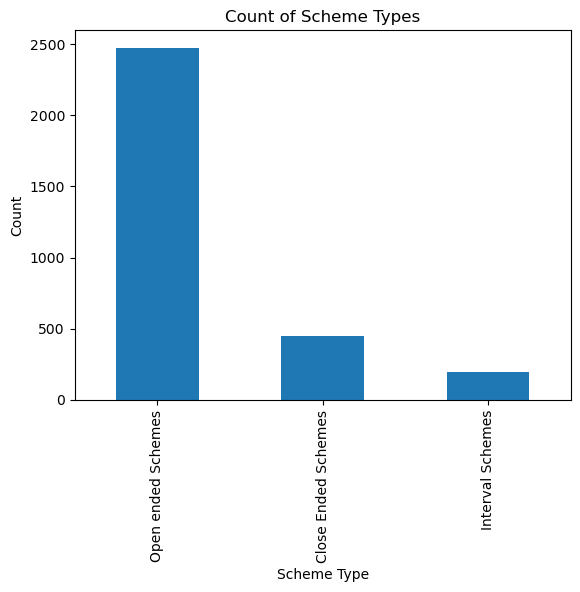

In [54]:
# 1 — Bar Plot: Count of Scheme Types
df['scheme_type'].value_counts().plot(kind='bar')
plt.xlabel("Scheme Type")
plt.ylabel("Count")
plt.title("Count of Scheme Types")
plt.show()


Insight

Open-ended schemes are the highest. fundsThis highlights investor preference for liquidity, flexibility, and continuous investment options offered by open-ended funds.

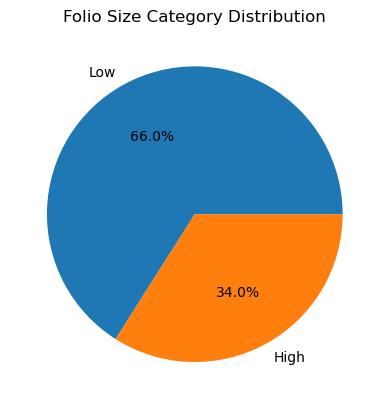

In [55]:
# 2 —Pie Chart: Folio Size Category
df['folio_size_category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Folio Size Category Distribution")
plt.ylabel("")
plt.show()


Insight

Majority of mutual fund schemes have smaller investor participation.

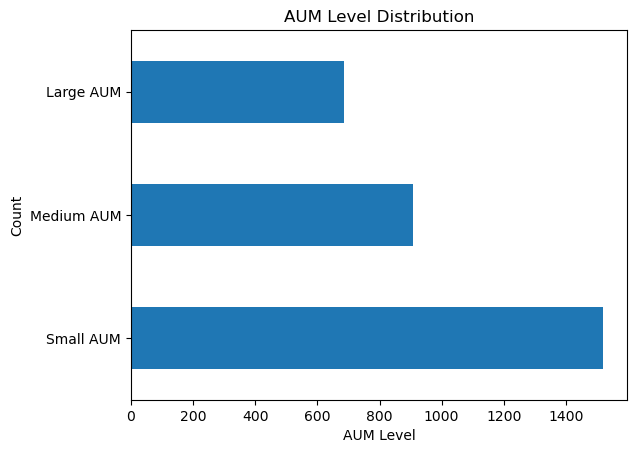

In [56]:
# 3 — Horizontal Bar Chart: AUM Level Category
df['aum_level'].value_counts().plot(kind='barh')
plt.title("AUM Level Distribution")
plt.xlabel("AUM Level")
plt.ylabel("Count")
plt.show()


Insight

Small AUM schemes are the most common, many funds have low investment volumes. Large AUM schemes are fewer but likely represent the most successful and popular funds.”

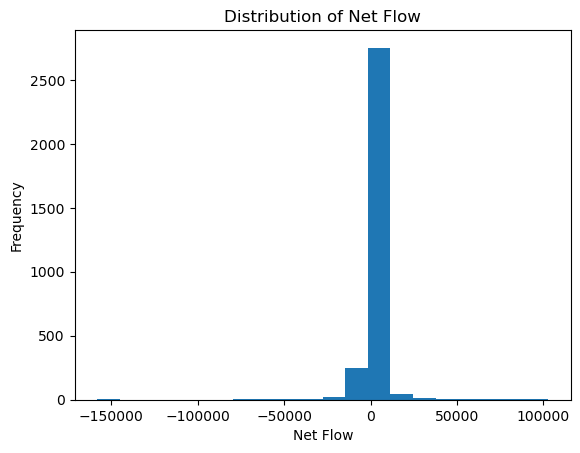

In [57]:
# 4 — Histogram: Net Inflow/Outflow
df['net_inflow_outflow'].plot(kind='hist', bins=20)
plt.title("Distribution of Net Flow")
plt.xlabel("Net Flow")
plt.show()


Insight

It shows that most mutual fund schemes have stable money movement with net flow around zero. Only a few schemes experience extreme inflows or outflows.


#### Bivariate Analysis (Two columns)

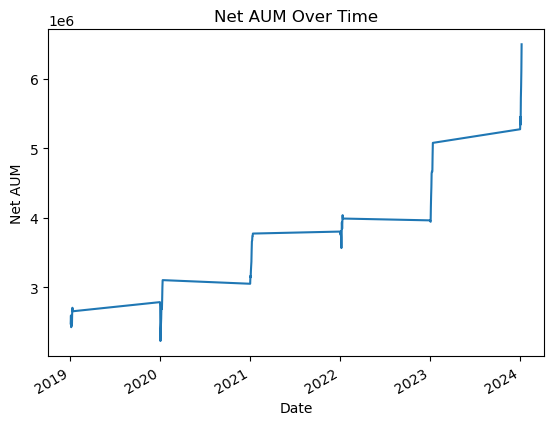

In [58]:
# 5 — Line Chart: Net AUM Over Time

df.sort_values('date', inplace=True)
df.groupby('date')['net_aum'].sum().plot(kind='line')
plt.title("Net AUM Over Time")
plt.xlabel("Date")
plt.ylabel("Net AUM")
plt.show()


Insight

The total Net AUM increases year by year, reflecting industry growth. Investors shifting from traditional assets (FD, gold) to mutual funds


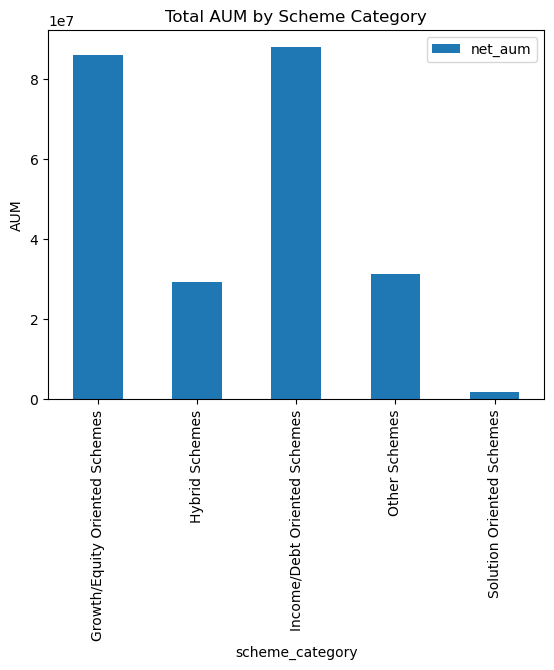

In [59]:
# 6 —Pivot Table Visual: Scheme Category vs Total AUM
pivot = df.pivot_table(values='net_aum',
                       index='scheme_category',
                       aggfunc='sum')

pivot.plot(kind='bar')
plt.title("Total AUM by Scheme Category")
plt.ylabel("AUM")
plt.show()


Insight

Equity and Debt categories dominate the mutual fund industry in terms of total AUM, reflecting strong demand for both growth and low-risk investment options. Hybrid schemes have moderate AUM, while Other and Solution-oriented schemes contribute very small shares, indicating lower investor adoption.


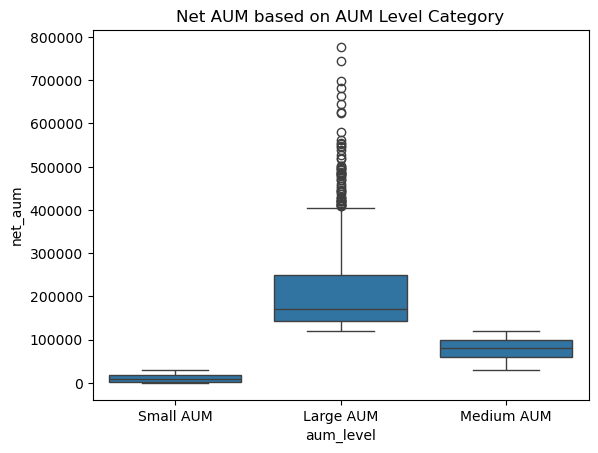

In [60]:
# 7— Boxplot: AUM Level vs Net AUM
sns.boxplot(x='aum_level', y='net_aum', data=df)
plt.title("Net AUM based on AUM Level Category")
plt.show()


Insight

It shows how Net AUM is distributed within each AUM category. Small AUM schemes have consistently low values, Medium AUM schemes have moderate values, and Large AUM schemes show high values with many outliers, meaning some schemes attract extremely large investments.


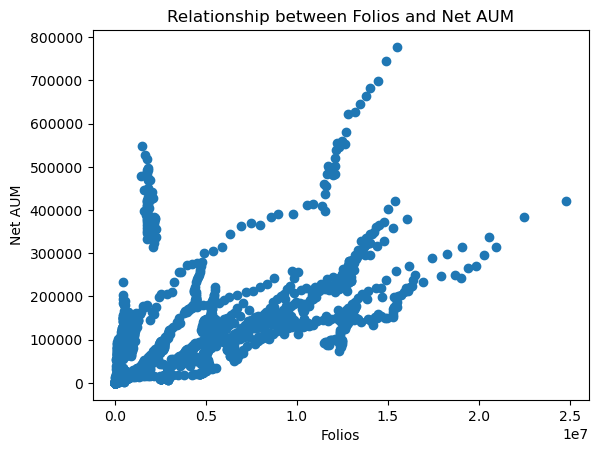

In [61]:
# 8 — Scatter Plot: Folios vs Net AUM
plt.scatter(df['no_of_folios'], df['net_aum'])
plt.xlabel("Folios")
plt.ylabel("Net AUM")
plt.title("Relationship between Folios and Net AUM")
plt.show()


Insight

Higher folio count generally leads to higher AUM, but institutional investments can create high AUM even with fewer investors


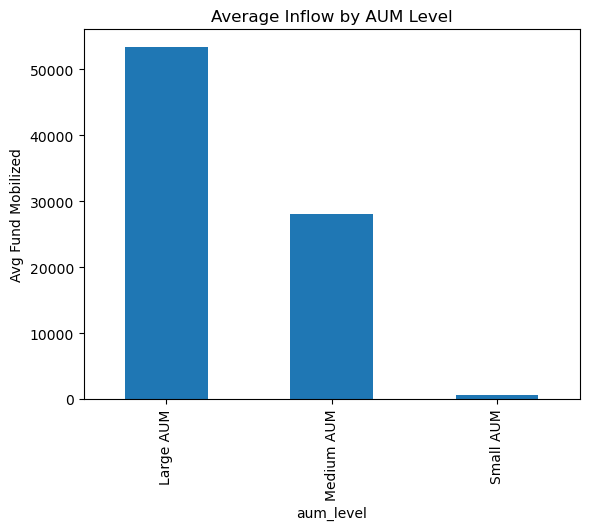

In [62]:
# 9— Groupby Plot: Average Inflow by AUM Level
grp = df.groupby('aum_level')['fund_mobilized'].mean()
grp.plot(kind='bar')
plt.title("Average Inflow by AUM Level")
plt.ylabel("Avg Fund Mobilized")
plt.show()


Insight

High AUM schemes receive higher inflow , stable investor confidence.B ecause investors trust large, established funds with consistent performance and high liquidity.

#### Multivariate Analysis

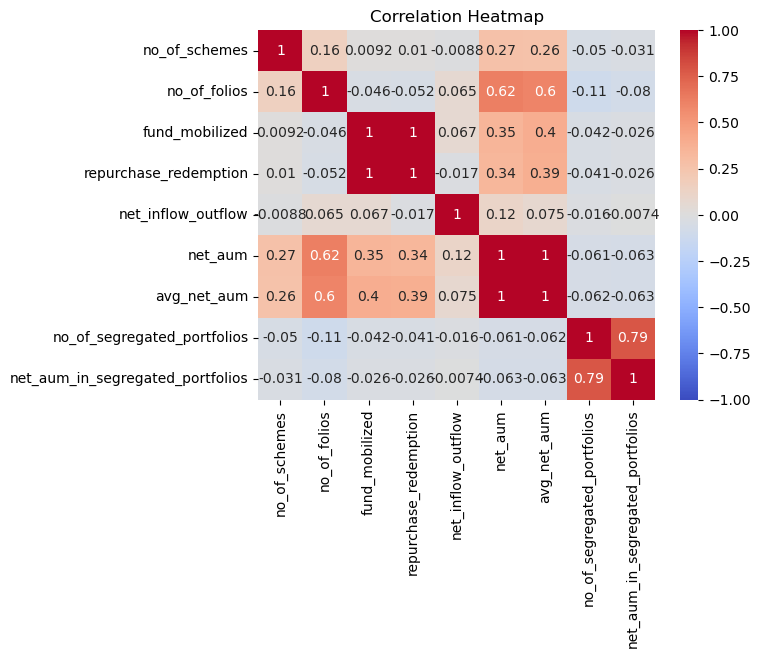

In [63]:
# 10 — Heatmap (Correlation)
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Insight

The correlation heatmap shows that Net AUM is strongly influenced by investor participation (folios) and closely aligns with average AUM. Fund inflows and redemptions move together, indicating active market churn. Segregated portfolios show strong correlation with segregated AUM, highlighting credit risk concentration. Many other variables show weak correlation, suggesting independent behavior.


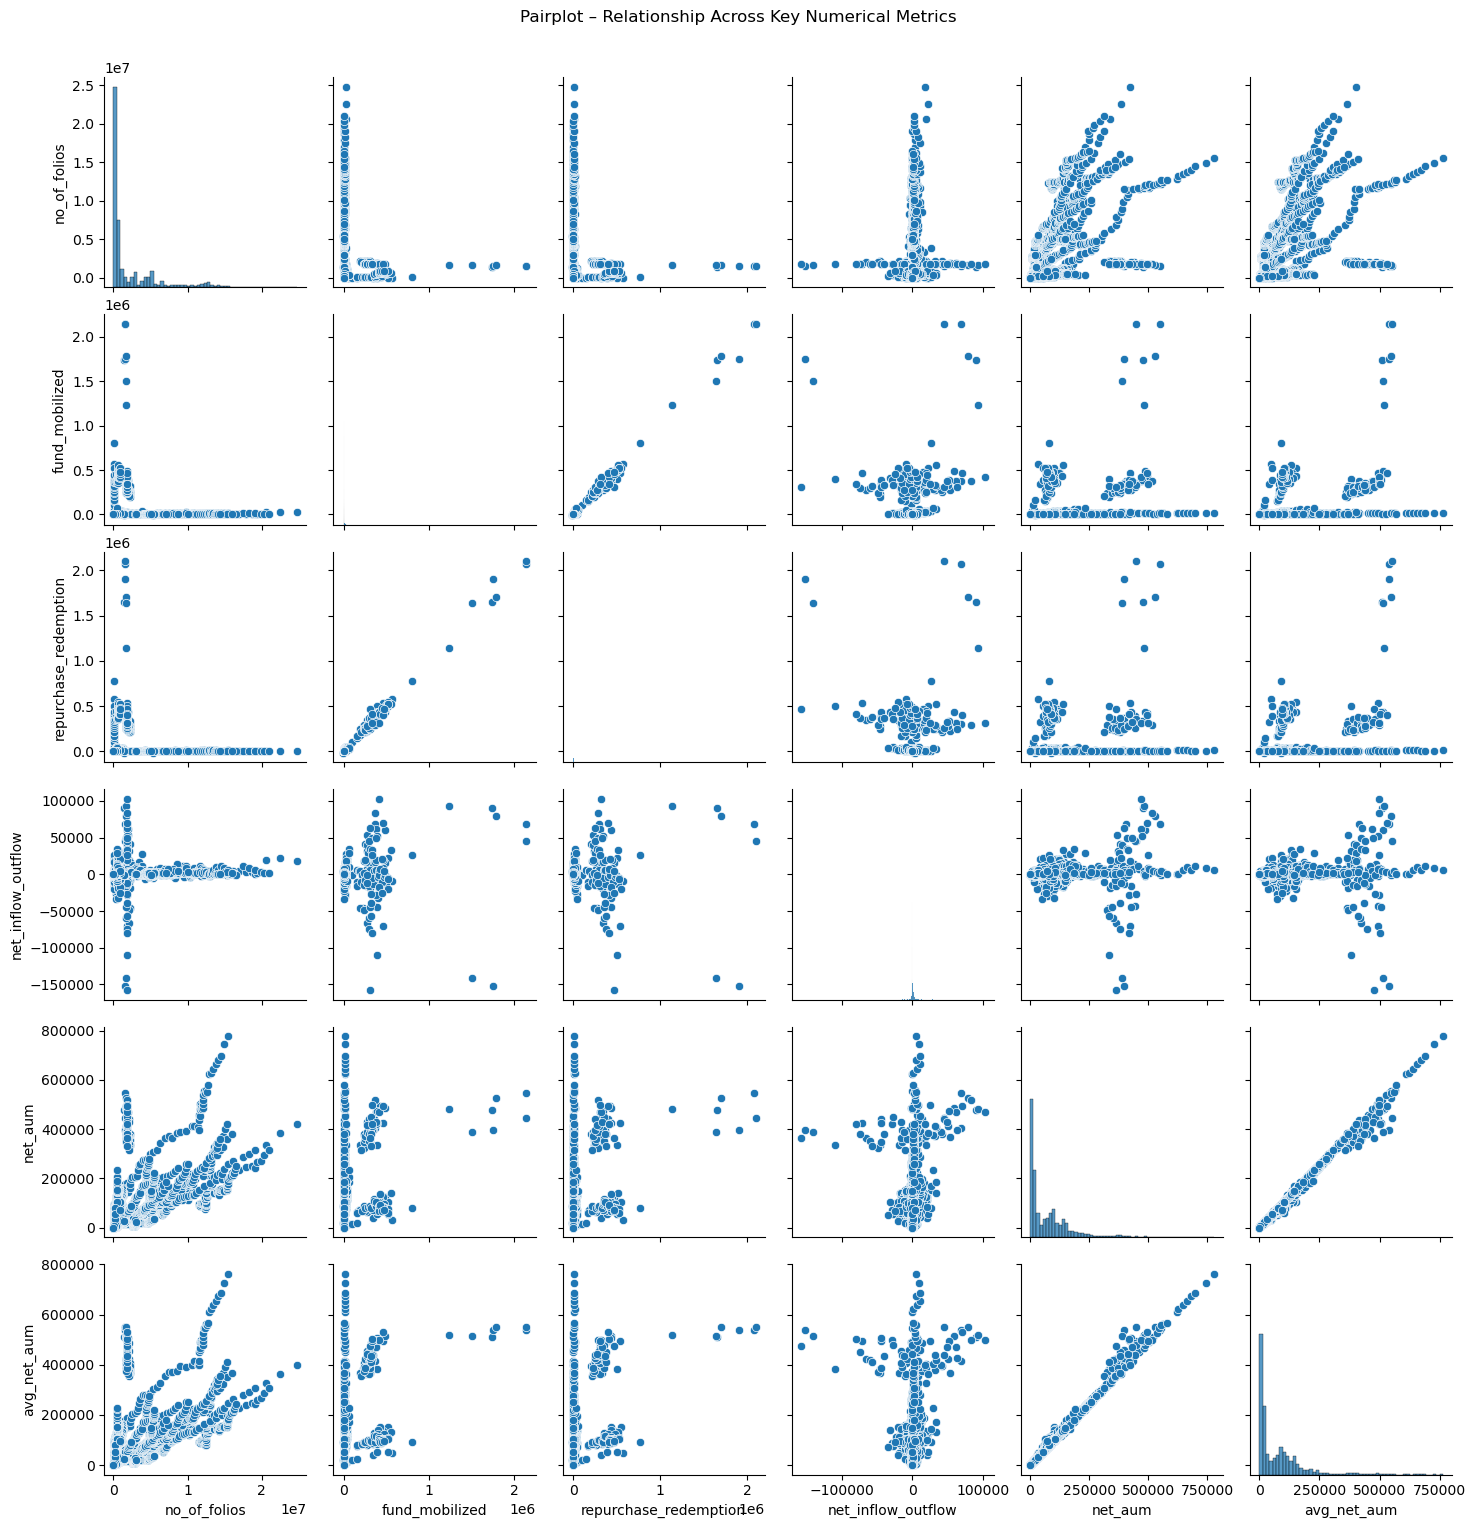

In [64]:
# 11-Pairplot (Relationship Across Key Numerical Features)
num_cols = ['no_of_folios','fund_mobilized','repurchase_redemption','net_inflow_outflow','net_aum','avg_net_aum']

sns.pairplot(df[num_cols])
plt.suptitle("Pairplot – Relationship Across Key Numerical Metrics", y=1.02)
plt.show()


Insight

The pairplot reveals strong relationships between Net AUM, Average AUM, and Number of Folios, confirming that investor participation is a key driver of fund size. Fund mobilization and redemptions move closely together, reflecting active money churn.

In [65]:
#12- Interactive Bubble Chart( AUM vs Folios)
fig = px.scatter(
    df,
    x="no_of_folios",
    y="net_aum",
    size="net_aum",
    color="scheme_category",
    hover_name="scheme_name",
    title="AUM vs Folios by Scheme Category (Interactive)",
    size_max=60
)
fig.show()


Insight

The bubble chart shows a strong positive relationship between investor participation and AUM. Equity-oriented schemes dominate in both folio count and fund size, while debt schemes achieve high AUM even with fewer investors due to institutional participation.


## Overall Insight

The overall analysis of mutual fund data clearly shows that:

1-Open-Ended Schemes dominate in Net AUM and attract the highest number of investors.

2-Income/Debt Oriented funds hold the maximum AUM, showing relatively stable and less risky investment demand.

3-Folios and AUM move together which indicates that schemes with high investor participation also manage higher AUM.

4-Net Inflow and Outflow fluctuates, meaning investors enter and exit frequently depending on market sentiment.

5-Average AUM and Net AUM are strongly correlated, which reflects consistent fund size without abnormal fluctuation.

6-Segregated portfolios are less, indicating that most funds are financially healthy without stressed assets separation.

7-Time series shows steady growth in overall AUM, demonstrating increasing investment trust over reporting periods.

8-Folio size and AUM level grouping helped understand where small, medium, and large investors contribute.

9-Very few high-risk scheme categories exist, confirming most investors prefer stable debt-oriented funds.

Overall dataset reflects positive investor confidence and a healthy mutual fund environment with constant inflow.

## RECOMMENDATIONS

1-Equity & Hybrid schemes should be prioritised by investors due to strong folio presence and high market trust.

2-Since inflows and outflows move together, short-term liquidity strategies should be monitored.

3-Debt-oriented categories can improve investor base through awareness since they form majority but show moderate folio participation.

4-Segregated portfolio occurrence is low but must be continuously tracked to monitor credit risk in debt schemes.

## CONCLUSION

The dataset shows a strong and healthy mutual fund environment where:

* Most investments stay within Open ended schemes.

* Investor base is large and concentrated in Equity and Hybrid categories.

* AUM stability is verified through strong avg_net_aum relationship.

* Very few segregated portfolios confirm minimal stressed asset separation.

* Majority schemes fall under medium to large folio range, indicating strong participation and confidence.